<a href="https://colab.research.google.com/github/suman-4214/Car-Price-Prediction-ML/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [26]:
#loading the data from csv file
car_dataset = pd.read_csv('/content/car data.csv')

In [27]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
car_dataset.shape

(301, 9)

In [29]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [30]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [31]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding categorical data

In [32]:
#checking the actual names of the attributes
print(car_dataset['Fuel_Type'].unique())
print(car_dataset['Seller_Type'].unique())
print(car_dataset['Transmission'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']


In [33]:
car_dataset['Fuel_Type'] = (
    car_dataset['Fuel_Type']
    .str.strip()
    .str.title()
    .map({'Petrol': 0, 'Diesel': 1, 'Cng': 2})
)

car_dataset['Seller_Type'] = (
    car_dataset['Seller_Type']
    .str.strip()
    .str.title()
    .map({'Dealer': 0, 'Individual': 1,})
)
car_dataset['Transmission'] = (
    car_dataset['Transmission']
    .str.strip()
    .str.title()
    .map({'Manual': 0, 'Automatic': 1})
)

In [34]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the Data and Target

In [35]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [36]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [37]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Training and Test data

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=2)


Model Training

1. Linear Regression

In [39]:
#Linear regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [40]:
#Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [41]:
# r squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8799451660493711


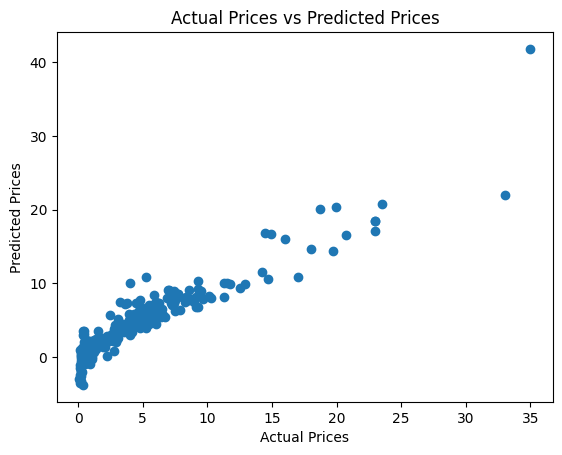

In [42]:
#visualize the actual and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [43]:
#Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [44]:
# r squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8365766715027051


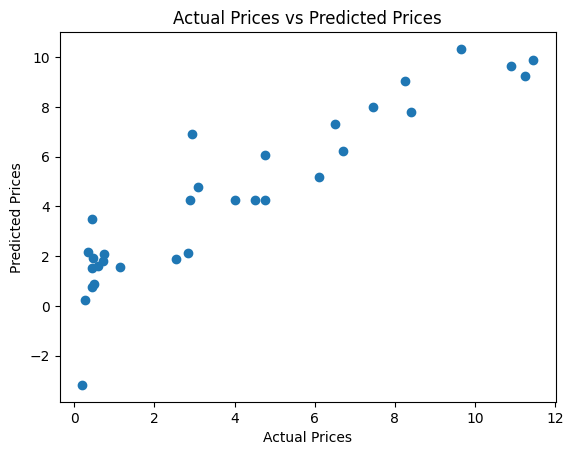

In [45]:
#visualize the actual and predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [46]:
#Lasso regression
lass_reg_model = Lasso()
lass_reg_model.fit(X_train, Y_train)

Lasso()

In [47]:
#Prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [48]:
# r squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


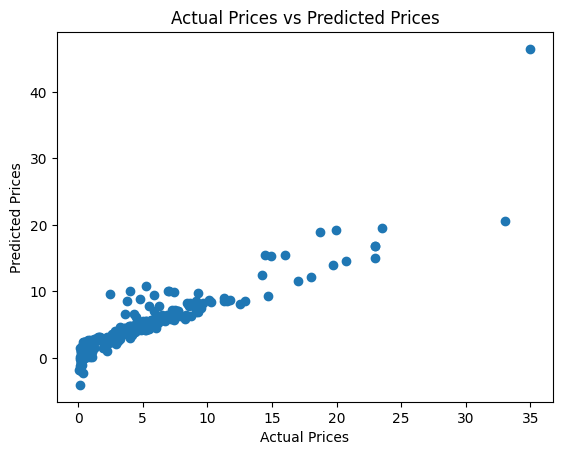

In [49]:
#visualize the actual and predicted prices
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [50]:
#Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [51]:
# r squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


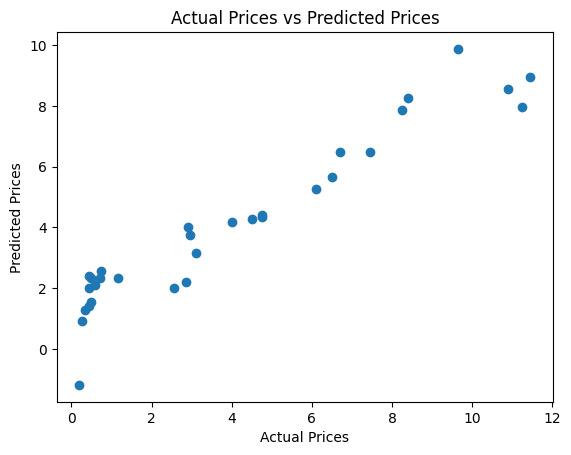

In [52]:
#visualize the actual and predicted prices
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()